# Task 2

### Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

## I used Black Friday Dataset From Kaggle
https://www.kaggle.com/datasets/sdolezel/black-friday

## Import Library

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

## Importing the dataset

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


#### Merge Both Train And Test data

In [4]:
df = pd.concat([df_train, df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.drop(['User_ID'],axis = 1,inplace = True)

In [8]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Data Preprocessing

#### Handling Categorical Features

In [9]:
# handling the Gender Feature
df['Gender']= df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
# handling Age feature
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df['Age']= df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
# handling city_category feature
df_city = pd.get_dummies(df['City_Category'],drop_first = True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [13]:
df= pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [14]:
df=df.drop('City_Category',axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [15]:
# handling stay_in_current_city_years feature
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace("+", " ", regex=False)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4,0,8,NaN,NaN,7969.0,0,1


In [16]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

#### Handling Missing Values

In [17]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [18]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [19]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [21]:
# handle missing value
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [22]:
df['Product_Category_2'].isnull().sum()

0

In [23]:
# handle product category 3
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [24]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [25]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [26]:
df['Product_Category_2'].isnull().sum()

0

In [27]:
# converting into Integer
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


## Data Visualization

## Demographic Analysis

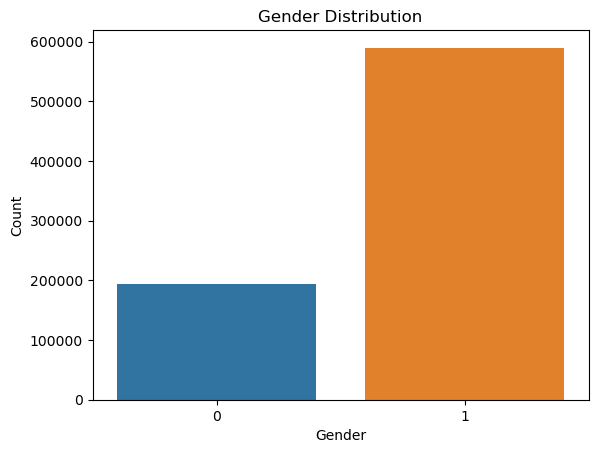

In [29]:
# Gender Distribution Plot
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

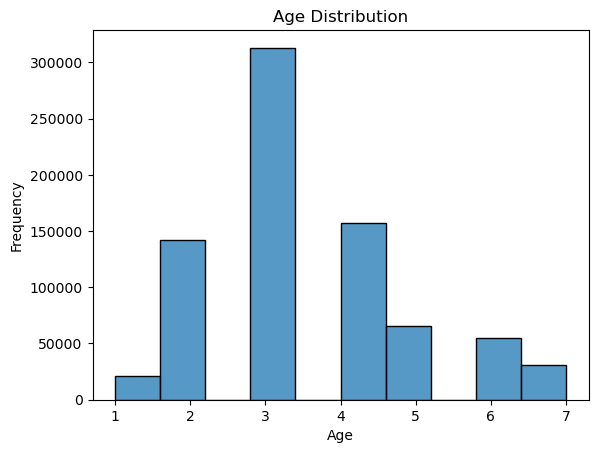

In [30]:
# Age Distribution Plot
sns.histplot(df['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

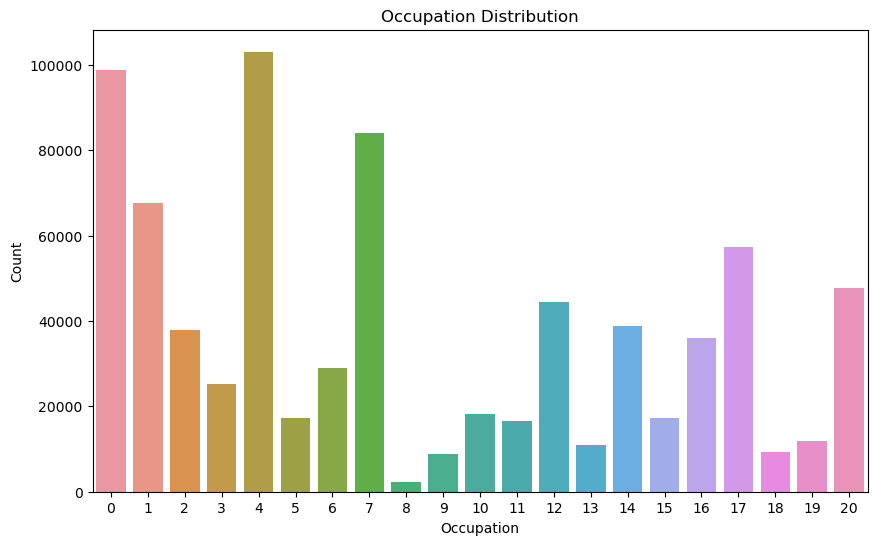

In [31]:
# Occupation Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', data=df)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

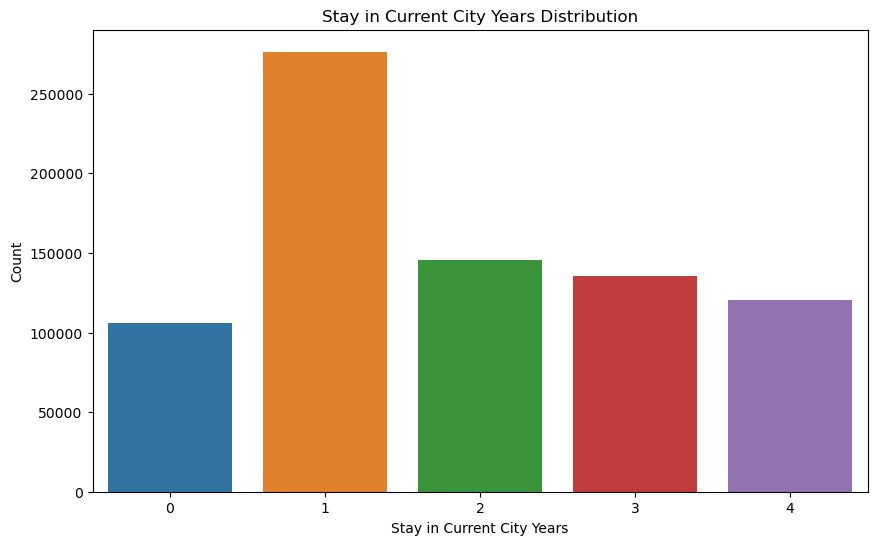

In [32]:
# Stay in Current City Years Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Stay_In_Current_City_Years', data=df)
plt.title('Stay in Current City Years Distribution')
plt.xlabel('Stay in Current City Years')
plt.ylabel('Count')
plt.show()

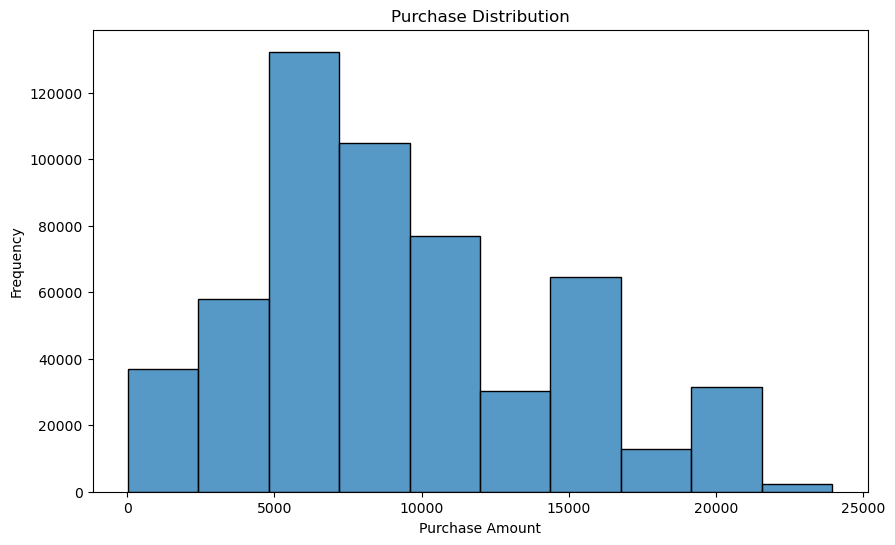

In [33]:
# Purchase Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], bins=10)
plt.title('Purchase Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

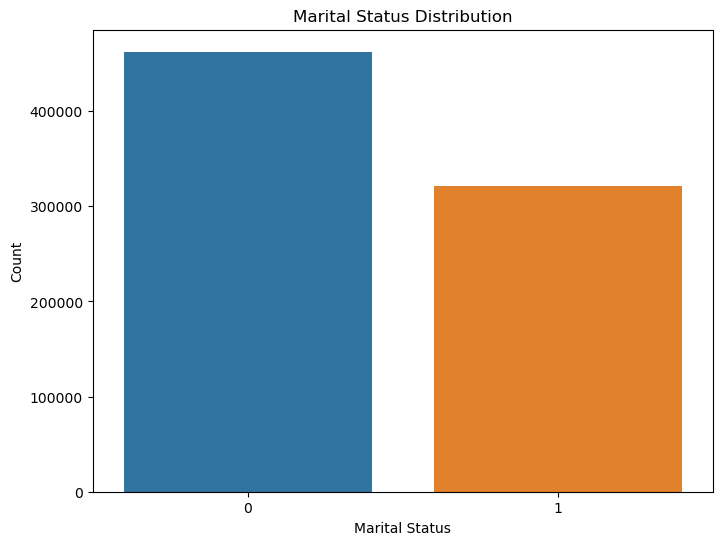

In [34]:
# Marital Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', data=df)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

## Purchase Behaviour Analysis

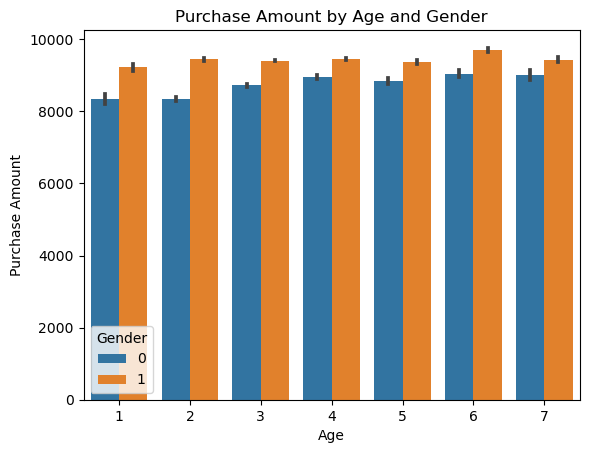

In [35]:
# Assuming df is your DataFrame and it has columns 'Age', 'Purchase', and 'Gender'
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)
plt.title('Purchase Amount by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

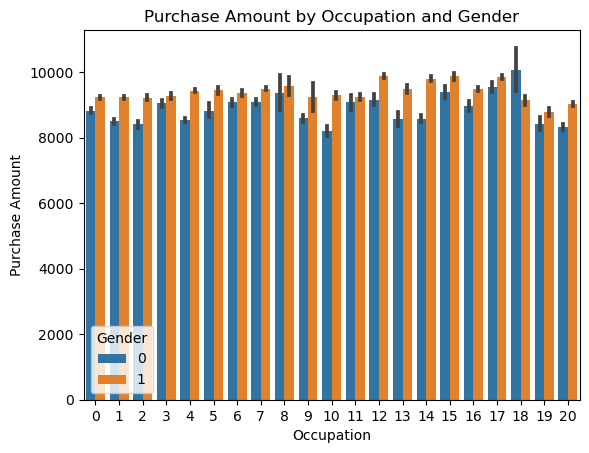

In [36]:
# Assuming df is your DataFrame and it has columns 'Occupation', 'Purchase', and 'Gender'
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)
plt.title('Purchase Amount by Occupation and Gender')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.show()

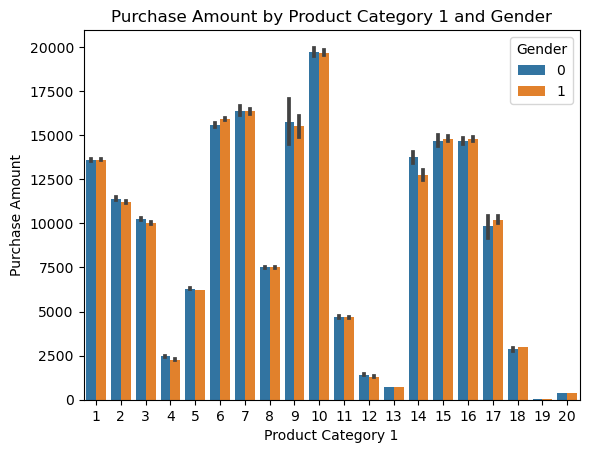

In [37]:
# Assuming df is your DataFrame and it has columns 'Product_Category_1', 'Purchase', and 'Gender'
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)
plt.title('Purchase Amount by Product Category 1 and Gender')
plt.xlabel('Product Category 1')
plt.ylabel('Purchase Amount')
plt.show()

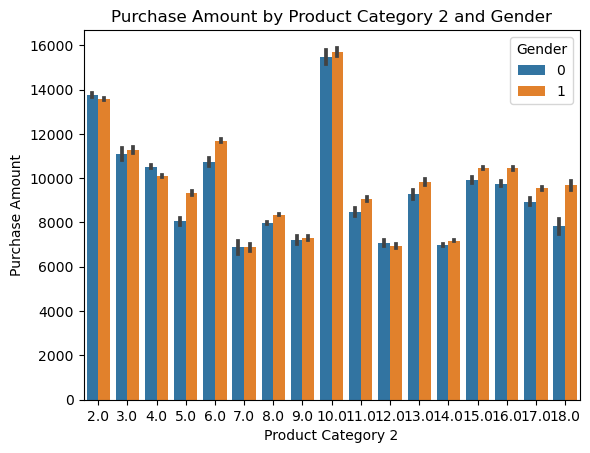

In [38]:
# Assuming df is your DataFrame and it has columns 'Product_Category_2', 'Purchase', and 'Gender'
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)
plt.title('Purchase Amount by Product Category 2 and Gender')
plt.xlabel('Product Category 2')
plt.ylabel('Purchase Amount')
plt.show()

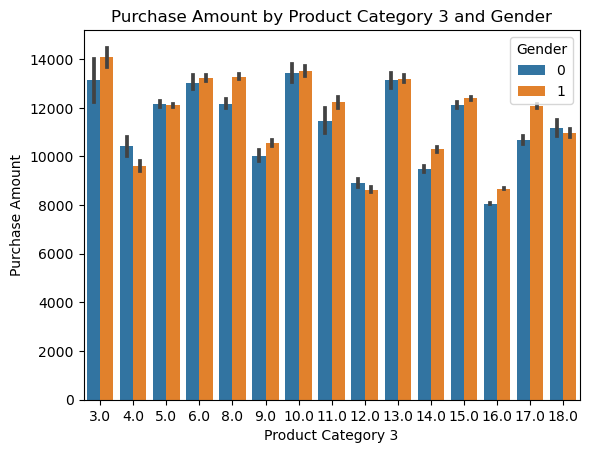

In [39]:
# Assuming df is your DataFrame and it has columns 'Product_Category_3', 'Purchase', and 'Gender'
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)
plt.title('Purchase Amount by Product Category 3 and Gender')
plt.xlabel('Product Category 3')
plt.ylabel('Purchase Amount')
plt.show()

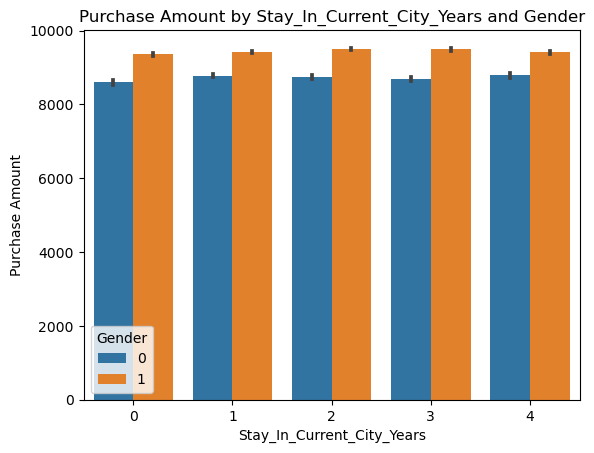

In [40]:
# Assuming df is your DataFrame and it has columns 'Stay_In_Current_City_Years', 'Purchase', and 'Gender'
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', hue='Gender', data=df)
plt.title('Purchase Amount by Stay_In_Current_City_Years and Gender')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Purchase Amount')
plt.show()

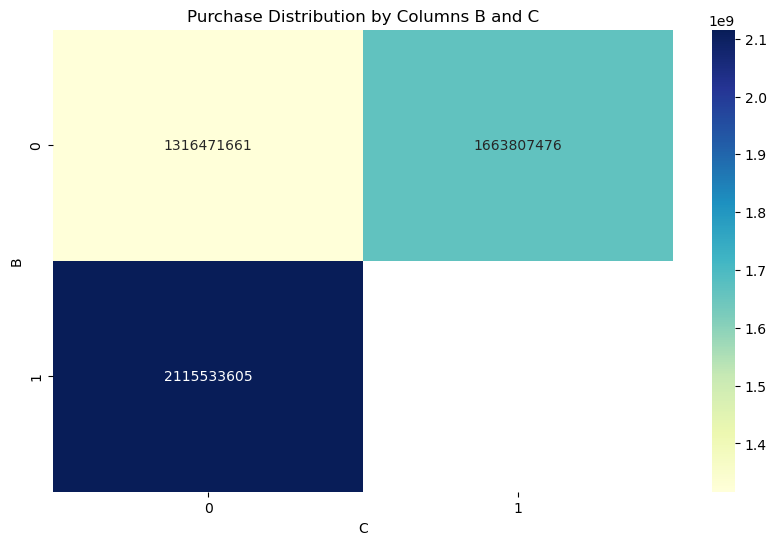

In [41]:
pivot_df = df.pivot_table(index='B', columns='C', values='Purchase', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Purchase Distribution by Columns B and C')
plt.xlabel('C')
plt.ylabel('B')
plt.show()

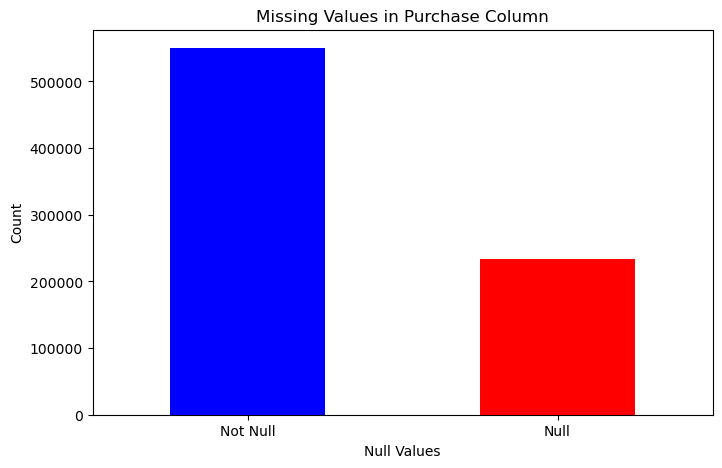

In [42]:
plt.figure(figsize=(8, 5))
df['Purchase'].isnull().value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Missing Values in Purchase Column')
plt.xlabel('Null Values')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Null', 'Null'], rotation=0)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6164\4207949847.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


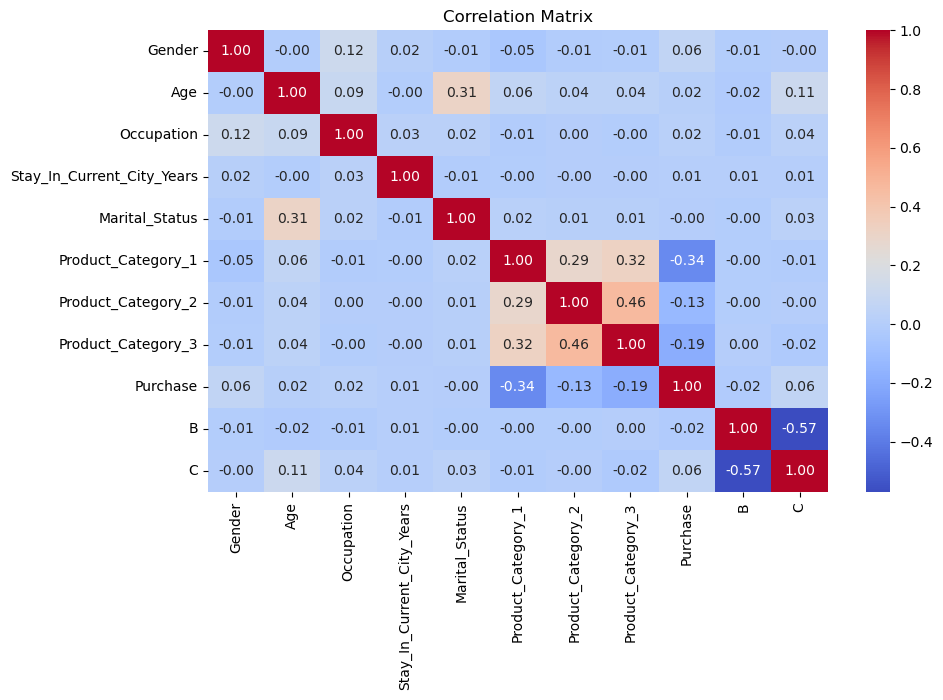

In [43]:
# Compute the correlation matrix for specific columns
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Summary

In [44]:

    mean_purchase = df.groupby('Age')['Purchase'].mean()

    print("Mean purchase by age group:")
    print(mean_purchase)  # Check mean purchase by age group

    # Find demographics with highest and lowest average purchase amounts
    highest_avg_purchase_age = mean_purchase.idxmax()
    lowest_avg_purchase_age = mean_purchase.idxmin()

    print("Highest average purchase age group:", highest_avg_purchase_age)
    print("Lowest average purchase age group:", lowest_avg_purchase_age)

    # Group by gender and find highest and lowest purchase amount
    mean_purchase_gender = df.groupby('Gender')['Purchase'].mean()
    highest_avg_purchase_gender = mean_purchase_gender.idxmax()
    lowest_avg_purchase_gender = mean_purchase_gender.idxmin()

    print("Mean purchase by gender (0-Female , 1- Male): ")
    print(mean_purchase_gender)
    print("Highest average purchase gender:", highest_avg_purchase_gender)
    print("Lowest average purchase gender:", lowest_avg_purchase_gender)

    # Print executive summary
    print("\nPurchase Behavior Analysis:\n")
    print("Key Findings:")
    print(f"- Age Group with Highest Average Purchase: {highest_avg_purchase_age}")
    print(f"- Age Group with Lowest Average Purchase: {lowest_avg_purchase_age}")
    print(f"- Gender with Highest Average Purchase: {highest_avg_purchase_gender}")
    print(f"- Gender with Lowest Average Purchase: {lowest_avg_purchase_gender}")


Mean purchase by age group:
Age
1    8933.464640
2    9169.663606
3    9252.690633
4    9331.350695
5    9208.625697
6    9534.808031
7    9336.280459
Name: Purchase, dtype: float64
Highest average purchase age group: 6
Lowest average purchase age group: 1
Mean purchase by gender (0-Female , 1- Male): 
Gender
0    8734.565765
1    9437.526040
Name: Purchase, dtype: float64
Highest average purchase gender: 1
Lowest average purchase gender: 0

Purchase Behavior Analysis:

Key Findings:
- Age Group with Highest Average Purchase: 6
- Age Group with Lowest Average Purchase: 1
- Gender with Highest Average Purchase: 1
- Gender with Lowest Average Purchase: 0


### Feature Scaling

In [102]:
df_train = df[~df['Purchase'].isnull()]
X = df_train.drop(['Purchase', 'Product_ID'], axis=1).values   # Convert to numpy array
y = df_train['Purchase'].values  # Convert to numpy array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [104]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [105]:
# Save the model and scaler using pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('standard_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [106]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 9312314.30050584


In [107]:
# Calculate correlation between predicted and actual values
correlation = pd.Series(y_pred).corr(pd.Series(y_test))
print(f'Correlation between Predicted and Actual Values: {correlation}')

Correlation between Predicted and Actual Values: 0.7958621589064852


In [108]:
# Load the trained model
with open('random_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the scaler
with open('standard_scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

In [109]:
# Define a function to make predictions
def predict_purchase(input_data):
    input_array = np.asarray(input_data).reshape(1, -1) 
    input_scaled = loaded_scaler.transform(input_array)  
    prediction = loaded_model.predict(input_scaled)
    return prediction[0]

input_data = [0, 3, 10, 2, 0, 3, 8, 16, 0, 0]  

predicted_purchase = predict_purchase(input_data)
print(f'Predicted Purchase Amount: {predicted_purchase:.2f}')

Predicted Purchase Amount: 11355.74
